# SVC
Es muy parecido al otro
Lo que cambia es la forma que se aplica 
---

Se realiza la division de datos

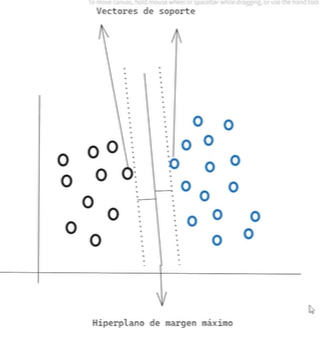

Una recta que divide los datos(hiperplano)  y tratar de encontrar la mejor division de datos posible
Los vectores serian las lineas mas cercanos al hiperplano



In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic
from colorama import Style, Fore, Back


### Preparacion de Datos

In [11]:
data = pd.read_csv("Data/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
X = data.iloc[:, [2, 3]] # La edad y el salario estimado
y = data.iloc[:, -1].values # La columna Purchased

In [13]:
#
#* Nos encargamos de la variable categorica Gender
gender = data[["Gender"]]

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(gender)

print(ic(cat_encoder.categories_))

ic| cat_encoder.categories_: [array(['Female', 'Male'], dtype=object)]


[array(['Female', 'Male'], dtype=object)]


In [14]:
encoded_df = pd.DataFrame(data_cat_1hot.toarray(), columns=cat_encoder.get_feature_names_out()) # Explicacion: El resultado de la codificacion one hot es una matriz dispersa, por lo que tenemos que convertirla a un dataframe para poder visualizarla.
#* La matriz dispersa es una matriz que contiene muchos ceros, por lo que se almacena de forma eficiente en memoria.
encoded_df.head(3)

,Gender_Female,Gender_Male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0


In [15]:
data_1 = pd.concat([X, encoded_df], axis=1) # Concatenamos la matriz de edad y salario estimado con la matriz de codificacion one hot.
data_1.head(3)
ic(data_1.shape)

ic| data_1.shape: (400, 4)


(400, 4)

In [16]:
#
#* Separamos los datos en train y test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_1, y, test_size=0.2, random_state=0) # Explicacion: Separamos los datos en train y test, el 80% de los datos se usan para entrenar el modelo y el 20% para probarlo.

In [17]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() # Explicacion: Se crea un objeto de la clase StandardScaler, que se encargara de estandarizar los datos.
X_train = sc_X.fit_transform(X_train) # Explicacion: Se ajusta el objeto StandardScaler a los datos de entrenamiento y se transforma los datos de entrenamiento.
X_test = sc_X.transform(X_test) # Explicacion: Se transforma los datos de prueba con el objeto StandardScaler ya ajustado a los datos de entrenamiento.

### Algoritmo SVC


In [18]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', random_state=0) # Explicacion: Se crea un objeto de la clase SVC, que se encargara de entrenar el modelo SVM con un kernel lineal.
svc.fit(X_train, y_train) # Explicacion: Se entrena el modelo SVM con los datos de entrenamiento.

SVC(kernel='linear', random_state=0)

In [19]:
y_pred = svc.predict(X_test) # Explicacion: Se predicen los resultados de los datos de prueba con el modelo SVM ya entrenado.
ic(y_pred)
ic(y_test)

ic| y_pred: array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
                   0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
                   0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)
ic| y_test: array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
                   0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
                   1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
                   0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

#### Evaluacion

In [20]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, f1_score
cm = confusion_matrix(y_test, y_pred) # Explicacion: Se crea una matriz de confusiones con los datos de prueba y las predicciones del modelo SVM.
ic(cm)
recall = recall_score(y_test, y_pred) # Explicacion: Se calcula el recall del modelo SVM con los datos de prueba y las predicciones del modelo SVM.
ic(recall)
accuracy = accuracy_score(y_test, y_pred) # Explicacion: Se calcula la precision del modelo SVM con los datos de prueba y las predicciones del modelo SVM.
ic(accuracy)
precision = precision_score(y_test, y_pred) # Explicacion: Se calcula la precision del modelo SVM con los datos de prueba y las predicciones del modelo SVM.
ic(precision)
f1 = f1_score(y_test, y_pred) # Explicacion: Se calcula el f1 score del modelo SVM con los datos de prueba y las predicciones del modelo SVM.
ic(f1)

ic| cm: array([[57,  1],
               [ 6, 16]], dtype=int64)
ic| recall: 0.7272727272727273
ic| accuracy: 0.9125
ic| precision: 0.9411764705882353
ic| f1: 0.8205128205128205


0.8205128205128205